In [1]:
from synergy.combination import MuSyC
from synergy.utils.dose_tools import grid

In [2]:
E0, E1, E2, E3 = 1, 0.7, 0.4, 0.
h1, h2 = 2.3, 0.8
C1, C2 = 1e-2, 1e-1
oalpha12, oalpha21 = 3.2, 1.1
gamma12, gamma21 = 2.5, 0.8

truemodel = MuSyC(E0=E0, E1=E1, E2=E2, E3=E3, h1=h1, h2=h2, C1=C1, C2=C2, oalpha12=oalpha12, \
              oalpha21=oalpha21, gamma12=gamma12, gamma21=gamma21)

In [3]:
print(truemodel)

MuSyC(E0=1.00, E1=0.70, E2=0.40, E3=0.00, h1=2.30, h2=0.80, C1=1.00e-02, C2=1.00e-01, oalpha12=3.20, oalpha21=1.10, beta=0.67, gamma12=2.50, gamma21=0.80)


In [4]:
print(truemodel.E(C1, C2))

0.3665489890285983


In [5]:
d1, d2 = grid(C1/1e2, C1*1e2, C2/1e2, C2*1e2, 8, 8)
print(d1.shape, d2.shape)

(64,) (64,)


In [7]:
E = truemodel.E(d1, d2)
print(E.shape)

(64,)


In [38]:
import numpy as np

E_noisy = E * (1+0.1*(2*np.random.rand(len(E))-1))
print(E_noisy.shape)

(64,)


In [39]:
model = MuSyC()
model.fit(d1, d2, E_noisy, bootstrap_iterations=100)
print(model)

MuSyC(E0=0.93, E1=0.68, E2=0.42, E3=0.00, h1=1.86, h2=1.12, C1=9.64e-03, C2=1.24e-01, oalpha12=3.75, oalpha21=1.08, beta=0.81, gamma12=2.01, gamma21=0.98)


In [40]:
print(model.get_parameter_range().T)

[[ 0.91223345  0.96329156]
 [ 0.64643766  0.70749396]
 [ 0.39022822  0.44990642]
 [-0.02507603  0.02363363]
 [ 1.26005438  2.73713318]
 [ 0.93018994  1.43865508]
 [ 0.00760803  0.01384544]
 [ 0.10018859  0.15263104]
 [ 2.85988609  4.6230902 ]
 [ 0.73239517  1.79969918]
 [ 0.69827786  0.95770258]
 [ 1.44083572  2.76863031]
 [ 0.56548907  1.83905139]]


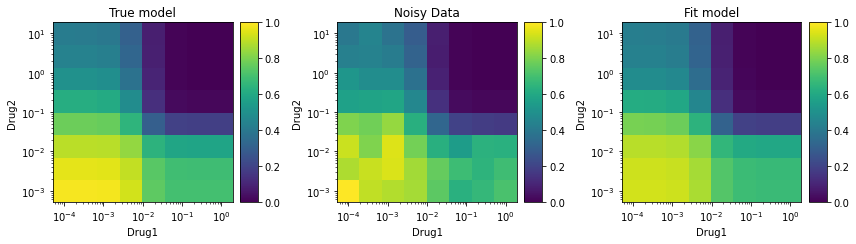

In [53]:
from matplotlib import pyplot as plt
from synergy.utils import plots

fig = plt.figure(figsize=(12,6))

ax = fig.add_subplot(131)
truemodel.plot_colormap(d1, d2, xlabel="Drug1", ylabel="Drug2", title="True model", ax=ax, vmin=0, vmax=1)

ax = fig.add_subplot(132)
plots.plot_colormap(d1, d2, E_noisy, ax=ax, title="Noisy Data", cmap="viridis", xlabel="Drug1", ylabel="Drug2", vmin=0, vmax=1)

ax = fig.add_subplot(133)
model.plot_colormap(d1, d2, xlabel="Drug1", ylabel="Drug2", title="Fit model", ax=ax, vmin=0, vmax=1)

plt.tight_layout()